In [7]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# Authentication
consumerKey = "I0NcEqHFSphjZ6WsxgcV9Ki6o"
consumerSecret = "SPUx69Cskqf8XJ2P9aogyOAmZCAKHbRxuqAy9S9fG99cgRwno2"
accessToken = "1270740046639820800-Jo7nfHpodPtG1UEl9wOsvAlErgdKMx"
accessTokenSecret = "ObeRQ0aWOnPFZZKePI4WpGab9rcxHsEyp5T89QjDFMRAi"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [9]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: education
Please enter how many tweets to analyze: 100


In [10]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  37
negative number:  27
neutral number:  36


In [11]:
tweet_list

,0
0,𝙆𝙪𝙙𝙤𝙨 𝙩𝙤 𝙀𝘼𝙊'𝙨 𝙂𝙤𝙫𝙚𝙧𝙣𝙤𝙧 𝙖𝙣𝙙 𝙑𝙞𝙘𝙚 𝙂𝙤𝙫𝙚𝙧𝙣𝙤𝙧!\n\n...
1,RT @mkstalin: Attended the 36th Convocation Ce...
2,RT @mmpadellan: I'll never understand how Kent...
3,RT @ShelliWms: persons of color and transgende...
4,RT @amerix: What they say: \n\n- Fasting will ...
...,...
95,RT @Theholisticpsyc: Subjects that should be t...
96,RT @jv_carter: From the attack on Education to...
97,RT @amerix: You go to a supermarket to buy mea...
98,"RT @ashokgehlot51: On #NationalEducationDay, l..."


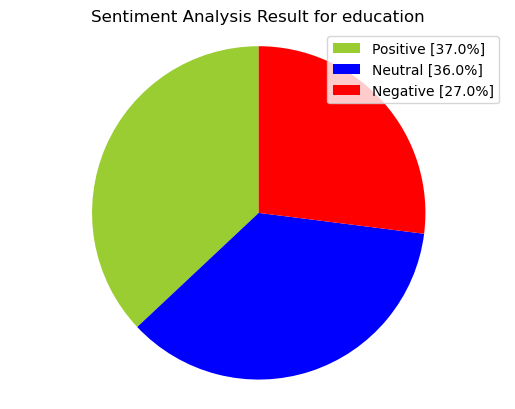

In [12]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for "+keyword+"" )
plt.axis('equal')
plt.show()